# Project 2： Clustering
In this project, we are still working with the “20 Newsgroups” dataset and performing K-means clustering on this dataset. By extracting significant features(TF_IDF matrix) from documents, applying dimension reduction techniques(LSI and NMF) with different preprocessing tools(normalization and logrithm) to high-dimensional feature vectors, and finally classifitying them into clusters. By visualizing the clustering results, various measures of purity and the contigency matrix, we are able to evaluate the performance of k-means clustering and get a better understanding of how dimension reduction and preprocessing can affect the clustering results.

In [1]:
import numpy as np
import sklearn
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1
- Load the dataset for 8 sub-classes:
> - Computer Technology: 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'
> - Recreational Activity: 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'

- Build the TF-IDF matrix:
> - After excluding the stop words, we still use *CountVectorizer* to get the term-document matrix under conditin min_df = 3, and use *TfidfTransformer* to get the TF-IDF feature matrix
> - The size of TF-IDF matrix is **(7882, 27743)**



In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', \
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# Raw data
X_8 = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
data_8 = X_8.data 
label_8 = (X_8.target > 3).astype(int)

In [3]:
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation

# Create our own stopwords set
stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en), set(punctuation), set(stop_words_skt))

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Get the term-document matrix under the condition: min_df=3
count_vect_3 = CountVectorizer(min_df=3, stop_words = combined_stopwords)

X_8_counts = count_vect_3.fit_transform(data_8)

# Get the TF_IDF feature matrix
tfidf_transformer = TfidfTransformer()

X_8_tfidf = tfidf_transformer.fit_transform(X_8_counts)
print(X_8_tfidf.shape)

(7882, 27743)


### Problem 2
In this part, we will inspect the contigency matrices and various measures of purity to get a sense of clustering results. Here, we use k = 2 for K-means clustering for the TF-IDF data. To make it easy for future use of plotting the contigency matrix and scores, we make them into two functions *print_plot_cnf_matrix* and *print_scores*.

#### (a) Inspect the contigency matrix
> By calling *print_plot_cnf_matrix*, we print and show the confusion matrix in the heat-map. In can be seen that nearly all the data are clustered into either the left-upper block or the right-lower block, which indicates that they are nearly clustered into two categories while just a small amount of data is classified incorrectly. This makes sense since the data we use here are from two categories "Computer Technology" and "Recreational Activity".

Contingency matrix
[[3585  318]
 [  45 3934]]


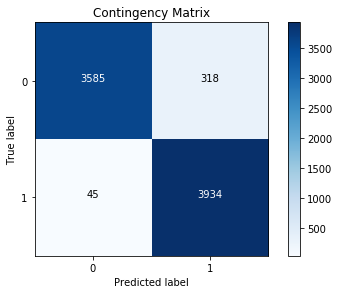

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
import itertools
km = KMeans(n_clusters = 2, max_iter = 300, random_state = 42, n_init = 1).fit(X_8_tfidf)
cnf_matrix = metrics.confusion_matrix(label_8, km.labels_)


def print_plot_cnf_matrix(cm, classes=[0,1]):
    """
    This function prints and plots the contingency matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Contingency Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    print('Contingency matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    np.set_printoptions(precision=2)
        
print_plot_cnf_matrix(cnf_matrix)

#### (b) Report the 5 measures for the K-means clustering results
Here, k = 2 for K-means clustering and we use the homogeneity score, the completeness score, the V-measure score, the adjusted Rand score and the adjusted mutual infor score to evaluate the K-means clustering performance.

|Homogeneity Score|Completeness Score|V-measure Score|Adjusted Rand Score|Adjusted Mutual Info Score|
|---|---|---|----|----|
|0.749|0.752|0.750|0.824|0.519|
  
  - Homogeneity Score: A measure of how "pure" the clusters are. If each cluster contains only data points from a single class, the homogeneity is satisfied. The higher the homogeneity score, the purer are the clustering results.
  
  - Completeness Score: A clustering result satisﬁes completeness if all data points of a class are assigned to the same cluster. Both of these scores span between 0 and 1; where 1 stands for perfect clustering. 
  
  - V-measure score: The harmonic average of homogeneity score and completeness score.
  
  - Adjusted Rand score: The adjusted Rand Index is similar to accuracy measure, which computes similarity between the clustering labels and groud truth labels. This method counts all pairs of points that both fall either in the same cluster and the same class or in different clusters and different classes.
  
  - Ajusted Mutual Info score: It measures the mutual information between the cluster label distribution and the ground truth label distributions.
  
All these scores should fall in the range from 0 to 1. Since all of them are approaching 1, it is believed that k=2 is a reasonable number of clusters and this agrees with data that they are from two categories.
  

In [6]:
from sklearn import metrics
def print_scores(true_label, predict_label):
    print("Homogeneity Score: %0.3f" % metrics.homogeneity_score(true_label, predict_label))
    print("Completeness Score: %0.3f" % metrics.completeness_score(true_label, predict_label))
    print("V-measure Score: %0.3f" % metrics.v_measure_score(true_label, predict_label))
    print("Adjusted Rand Score: %.3f"
          % metrics.adjusted_rand_score(true_label, predict_label))
    print("Adjusted Mutual Info Score: %0.3f"
          % metrics.mutual_info_score(true_label, predict_label, contingency = None))

print_scores(label_8, km.labels_)

Homogeneity Score: 0.749
Completeness Score: 0.752
V-measure Score: 0.750
Adjusted Rand Score: 0.824
Adjusted Mutual Info Score: 0.519


### Problem 3 Dimensionality reduction

#### i. Report the plot the percent of the top r components can retain
In this question, we firstly perform SVD with r = 1000 that we will find the top 1000 important components so that we can find the ratio of the variance of particular r can retain. 
$$ratio[r] = \frac{variance\ retained\ by\ r^{th}\ component}{total\ variance}$$

Then, to find the variance of top r components that could retain, we can just simple exclude the least important features.

From our plot, it can be seen that the percentage of variance retained is increasing with r. It is because that by increasing r, we are including more and more dimensions, so that the reconstructed matrix with truncated SVD will be more alike the original TF-IDF matrix. Therefore, there should be a trend that the ratio of variance retained is increasing.

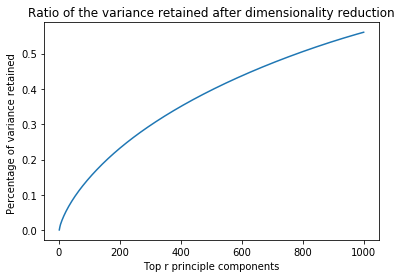

In [7]:
# LSI:

from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.random_projection import sparse_random_matrix

var_ratio = np.zeros(1000)
svd = TruncatedSVD(n_components = 1000, random_state = 42)
svd.fit_transform(X_8_tfidf)

for i in np.arange(1, 1001):
    var_ratio[i-1] = svd.explained_variance_ratio_[:i].sum()
# print(var_ratio)

plt.figure()
plt.plot(np.arange(1,1001), var_ratio)
plt.xlabel('Top r principle components')
plt.ylabel('Percentage of variance retained ')
plt.title('Ratio of the variance retained after dimensionality reduction')
plt.show()

#### ii.
Sweep over the dimension parameters for each method (Truncated SVD(LSI)/PCA and NMF), and choose the one that yields better results in terms of clustering purity metrics. 
>  To reduce the redundancy of codes, we calculate the five measure scores based on the predicted labels and the groud truth within the function *save_scores* and since we need to choose the best r for future use, this function will return a list of homogeneity score.

- **Truncated SVD (LSI):**

|r|Homogeneity score|Completeness score|V-measure score|Adjusted Rand score|Adjusted Mutual Info score|Contigency matrix|
|-|:-----------------|:------------------|:---------------|:-------------------|:--------------------------|-----------------|
|1|0.001|0.001|0.001|0.001|0.000|$\left( \begin{array}{cc}
    2114 & 1789  \\
    2276 & 1703 
\end{array}\right)$|
|2|0.580|0.581|0.581|0.680|0.402|$\left( \begin{array}{cc}
    3694 & 209  \\
    481 & 3498 
\end{array}\right)$|
|3|0.398|0.437|0.417|0.417|0.417|$\left( \begin{array}{cc}
    3869 & 34  \\
    1444 & 2535 
\end{array}\right)$|
|5|0.224|0.312|0.260|0.417|0.260|$\left( \begin{array}{cc}
    3898 & 5 \\
     2422 & 1557 
\end{array}\right)$|
|10|0.236|0.322|0.273|0.273|0.164|$\left( \begin{array}{cc}
    3900 & 3 \\
     2364 & 1615
\end{array}\right)$|
|20|0.236|0.322|0.272|0.159|0.163|$\left( \begin{array}{cc}
    3900 & 3 \\
     2365 & 1614
\end{array}\right)$|
|50|0.001|0.009|0.001|-0.000|0.000|$\left( \begin{array}{cc}
    3880 & 23 \\
     3933 & 46
\end{array}\right)$|
|100|0.009|0.122|0.016|0.001|0.006|$\left( \begin{array}{cc}
    3837 & 66 \\
     3979 & 0
\end{array}\right)$|
|300|0.776|0.778|0.777|0.855|0.538|$\left( \begin{array}{cc}
    229 & 3674 \\
     3912 & 67
\end{array}\right)$|

> From the above chart, we can see that the best purity occurs when **r = 300 for LSI**. As for heat maps of these contigency matrices, please refer to the results below that is directly printed from LSI codes. Except for r = 300, r = 2 also gives satisfactory scores, which agrees that there are two categories. While since the non-monotic performance of r, r = 300 is also possible


- **NMF:**

|r|Homogeneity score|Completeness score|V-measure score|Adjusted Rand score|Adjusted Mutual Info score|Contigency matrix|
|-|:-----------------|:------------------|:---------------|:-------------------|:--------------------------|-----------------|
|1|0.001|0.001|0.001|0.001|0.000|$\left( \begin{array}{cc}
    2114 & 1789  \\
    2276 & 1703 
\end{array}\right)$|
|2|0.676|0.677|0.676|0.774|0.468|$\left( \begin{array}{cc}
    3694 & 316  \\
    158 & 3821
\end{array}\right)$|
|3|0.229|0.316|0.265|0.153|0.159|$\left( \begin{array}{cc}
    3898 & 5  \\
    2392 & 1587
\end{array}\right)$|
|5|0.342|0.351|0.347|0.408|0.237|$\left( \begin{array}{cc}
    3586 & 317 \\
     1106 & 2873 
\end{array}\right)$|
|10|0.027|0.155|0.046|0.004|0.019|$\left( \begin{array}{cc}
    3697 & 206 \\
     3979 & 0
\end{array}\right)$|
|20|0.006|0.038|0.011|0.000|0.004|$\left( \begin{array}{cc}
    3863 & 40 \\
     3827 & 152
\end{array}\right)$|
|50|0.003|0.077|0.007|-0.000|0.002|$\left( \begin{array}{cc}
    3901 & 2 \\
     3942 & 37
\end{array}\right)$|
|100|0.002|0.024|0.003|0.000|0.001|$\left( \begin{array}{cc}
    46 & 3857 \\
     15 & 3964
\end{array}\right)$|
|300|0.005|0.107|0.009|-0.000|0.003|$\left( \begin{array}{cc}
    3903 & 0 \\
     3943 & 36
\end{array}\right)$|

> From the above chart, we can see that the best purity occurs when **r = 2 for NMF**. As for heat maps of these contigency matrices, please refer to the results below that is directly printed from NMF codes. This r = 2 is consistent with our expectation that no. of clusters should be equal to no. of categories.

**Question: How do you explain the non-monotonic behavior of the measures as r increases?**
> **Ans**: When performing Truncated SVD on to the data, we are looking for the top r main components that could represent the original data. These r main components are searched based on their large variance. To be concretely, the top 1 component has the largest variance, and the data is separated most clearly along this dimension. By using the top r components, we are clustering data based on these r dimensions. However, if we use too many components, the relatively useless components will act just as noise in the clustering process. Therefore, there exists a non-monotonic behaviror as r increases.

In [8]:
def save_scores(true_label, predict_label, homo, comp, vmeas, adjrs, mutis):
    homo.append(metrics.homogeneity_score(true_label, predict_label))
    comp.append(metrics.completeness_score(true_label, predict_label))
    vmeas.append(metrics.v_measure_score(true_label, predict_label))
    adjrs.append(metrics.adjusted_rand_score(true_label, predict_label))
    mutis.append(metrics.mutual_info_score(true_label, predict_label))
    
    return homo   

----------------------------------------
When r is 1 , Contigency matrix is: 
Contingency matrix
[[2114 1789]
 [2276 1703]]
Homogeneity Score: 0.001
Completeness Score: 0.001
V-measure Score: 0.001
Adjusted Rand Score: 0.001
Adjusted Mutual Info Score: 0.000
----------------------------------------
When r is 2 , Contigency matrix is: 
Contingency matrix
[[3694  209]
 [ 481 3498]]
Homogeneity Score: 0.580
Completeness Score: 0.581
V-measure Score: 0.581
Adjusted Rand Score: 0.680
Adjusted Mutual Info Score: 0.402
----------------------------------------
When r is 3 , Contigency matrix is: 
Contingency matrix
[[3869   34]
 [1444 2535]]
Homogeneity Score: 0.398
Completeness Score: 0.437
V-measure Score: 0.417
Adjusted Rand Score: 0.391
Adjusted Mutual Info Score: 0.276
----------------------------------------
When r is 5 , Contigency matrix is: 
Contingency matrix
[[3898    5]
 [2422 1557]]
Homogeneity Score: 0.224
Completeness Score: 0.312
V-measure Score: 0.260
Adjusted Rand Score: 0.14

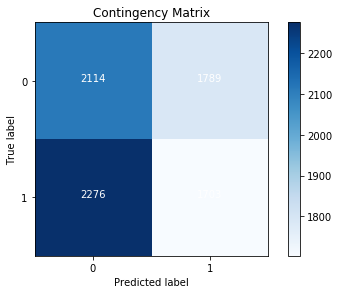

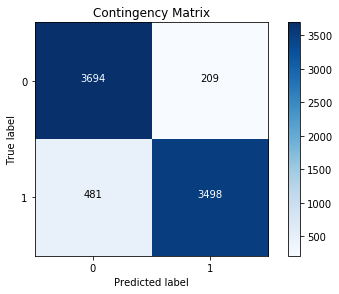

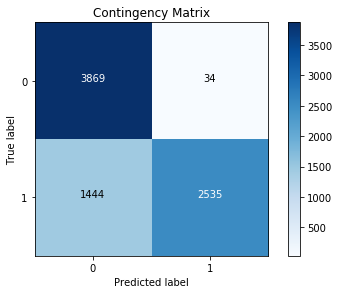

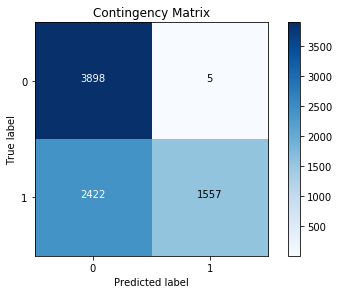

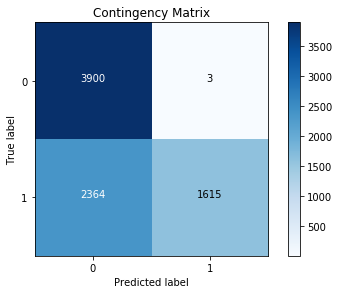

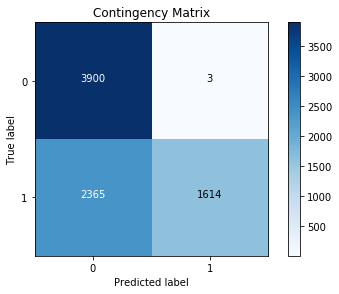

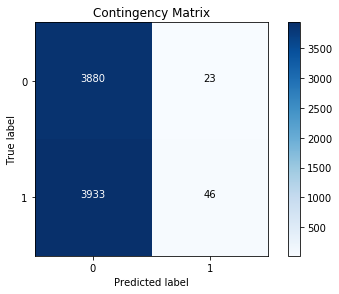

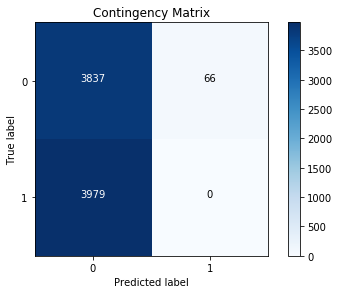

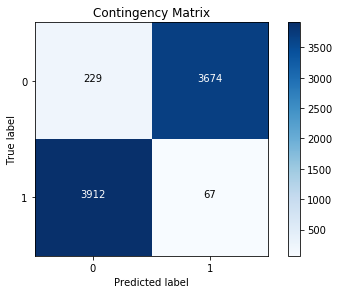

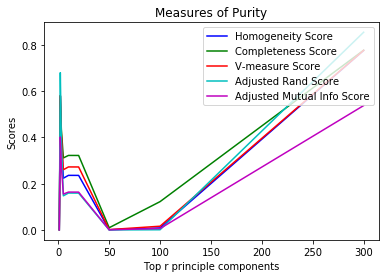

In [9]:
# perform with LSI
r = [1,2,3,5,10,20,50,100,300]
homo_lsi = []
comp_lsi = []
vmeas_lsi = []
adjrs_lsi = []
mutis_lsi = []
for each_r in r:
    svd = TruncatedSVD(n_components = each_r, random_state = 42)
    svd_reduced = svd.fit_transform(X_8_tfidf)
    km = KMeans(n_clusters = 2, max_iter = 500, random_state = 42, n_init = 1).fit(svd_reduced)
    print('-'*40)
    print('When r is', each_r, ', Contigency matrix is: ')
    cnf_matrix = metrics.confusion_matrix(label_8, km.labels_)
    print_plot_cnf_matrix(cnf_matrix)
    pass
    print_scores(label_8, km.labels_)
    lsi_homo = save_scores(label_8, km.labels_, homo_lsi, comp_lsi, vmeas_lsi, adjrs_lsi, mutis_lsi)

plt.figure()
plt.plot(r, homo_lsi, 'b', label = 'Homogeneity Score')
plt.plot(r, comp_lsi, 'g', label = 'Completeness Score')
plt.plot(r, vmeas_lsi, 'r', label = 'V-measure Score')
plt.plot(r, adjrs_lsi, 'c', label = 'Adjusted Rand Score')
plt.plot(r, mutis_lsi, 'm', label = 'Adjusted Mutual Info Score')
plt.xlabel('Top r principle components')
plt.ylabel('Scores')
plt.legend(loc = 'upper right')
plt.title('Measures of Purity')
plt.show()

----------------------------------------
When r is 1 , Contigency matrix is: 
Contingency matrix
[[2114 1789]
 [2276 1703]]
Homogeneity Score: 0.001
Completeness Score: 0.001
V-measure Score: 0.001
Adjusted Rand Score: 0.001
Adjusted Mutual Info Score: 0.000
----------------------------------------
When r is 2 , Contigency matrix is: 
Contingency matrix
[[3587  316]
 [ 158 3821]]
Homogeneity Score: 0.676
Completeness Score: 0.677
V-measure Score: 0.676
Adjusted Rand Score: 0.774
Adjusted Mutual Info Score: 0.468
----------------------------------------
When r is 3 , Contigency matrix is: 
Contingency matrix
[[3898    5]
 [2392 1587]]
Homogeneity Score: 0.229
Completeness Score: 0.316
V-measure Score: 0.265
Adjusted Rand Score: 0.153
Adjusted Mutual Info Score: 0.159
----------------------------------------
When r is 5 , Contigency matrix is: 
Contingency matrix
[[3586  317]
 [1106 2873]]
Homogeneity Score: 0.342
Completeness Score: 0.351
V-measure Score: 0.347
Adjusted Rand Score: 0.40

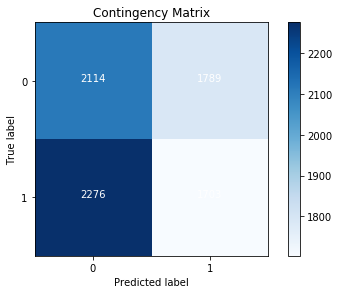

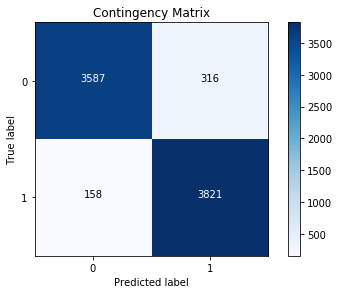

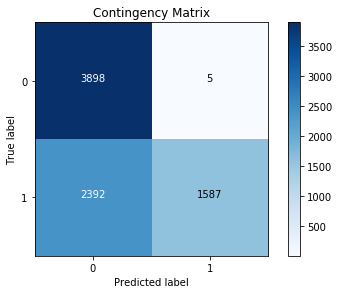

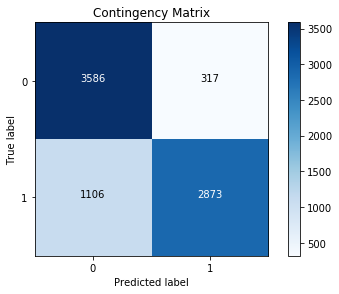

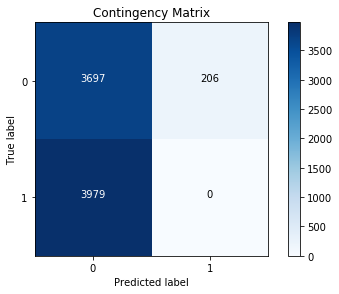

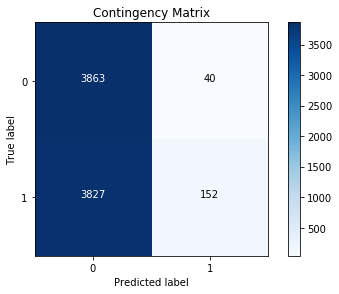

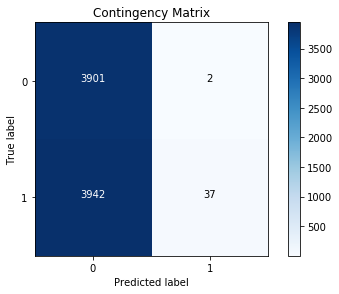

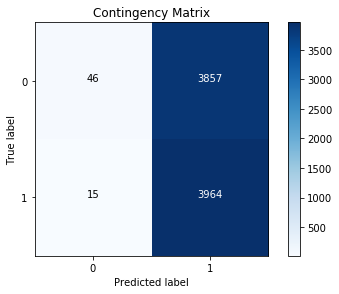

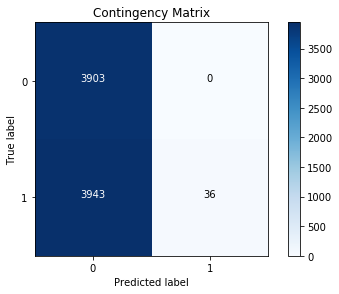

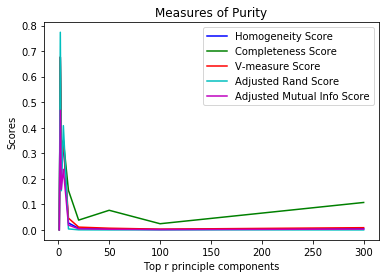

In [10]:
# perform with NMF
r = [1,2,3,5,10,20,50,100,300]
homo_nmf = []
comp_nmf = []
vmeas_nmf = []
adjrs_nmf = []
mutis_nmf = []
for each_r in r:
    nmf = NMF(n_components = each_r, random_state = 42)
    nmf_reduced = nmf.fit_transform(X_8_tfidf)
    km = KMeans(n_clusters = 2, max_iter = 500, random_state = 42, n_init = 1).fit(nmf_reduced)
    print('-'*40)
    print('When r is', each_r, ', Contigency matrix is: ')
    cnf_matrix = metrics.confusion_matrix(label_8, km.labels_)
    print_plot_cnf_matrix(cnf_matrix)

    print_scores(label_8, km.labels_)
    nmf_homo = save_scores(label_8, km.labels_, homo_nmf, comp_nmf, vmeas_nmf, adjrs_nmf, mutis_nmf)
    
plt.figure()
plt.plot(r, homo_nmf, 'b', label = 'Homogeneity Score')
plt.plot(r, comp_nmf, 'g', label = 'Completeness Score')
plt.plot(r, vmeas_nmf, 'r', label = 'V-measure Score')
plt.plot(r, adjrs_nmf, 'c', label = 'Adjusted Rand Score')
plt.plot(r, mutis_nmf, 'm', label = 'Adjusted Mutual Info Score')
plt.xlabel('Top r principle components')
plt.ylabel('Scores')
plt.legend(loc = 'upper right')
plt.title('Measures of Purity')
plt.show()


### Problem 4

#### (a) Visualize the performance of the case with best clustering resutls in the prevoius part of your clustering by projecting final data vectors onto 2 dimensional plane and color-coding the classes


We define several functions *print_cnf_and_score*, *svd_pipeline*, *nmf_pipeline* for the ease of future use first.
- Function *print_cnf_and_score*:
> By giving the predicted labels, ground truth, and the class labels, it will print out the contigency matrix, five measure scores.
- Function *svd_pipeline*:
> By giving r(the range of r we used in problem 3), model(homogeneity score of particular model, i.e. SVD), X(TF-IDF matrix), flag_norm(if we will perform normalization), n_clusters(number of clusters that will be used by k-Means), it will return the trained k-Means model and show the visualization of clustering results.
- Function *nmf_pipeline*:
> By giving r(the range of r we used in problem 3), model(homogeneity score of particular model, i.e. NMF), X(TF-IDF matrix), flag_norm(if we will perform normalization), n_clusters(number of clusters that will be used by k-Means), it will return the trained k-Means model and show the visualization of clustering results.

By calling these functions, we can see the visualiation results below.

- Analysis:
> It can be seen that both SVD and NMF dimension reduction methods give satisfactory results in clustering the TF-IDF matrix. The visualization of each of them shows that the data are linearly separable when required to cluster into two categories.  

In [11]:
def print_cnf_and_score(true_label, pred_label, classes = [0,1]):
    cnf_matrix = metrics.confusion_matrix(true_label, pred_label)
    print_plot_cnf_matrix(cnf_matrix, classes)
    print_scores(true_label, pred_label)

In [12]:
from sklearn.preprocessing import scale
def svd_pipeline(r, model, X, flag_norm = False, n_clusters = 2):
    best_r_svd = r[np.argmax(model)]
    svd = TruncatedSVD(n_components = best_r_svd, random_state = 42)
    svd_train = svd.fit_transform(X)
    if flag_norm:
        svd_reduced = scale(svd_train)
    else:
        svd_reduced = svd_train    

    km = KMeans(n_clusters, max_iter = 500, random_state = 42, n_init = 1).fit(svd_reduced)
    if n_clusters == 2:
        plt.scatter(svd_reduced[:, 0], svd_reduced[:, 1], marker = 'x', c = km.labels_, alpha = .6)
    else:
        svd_reduced_to_2 = TruncatedSVD(n_components = 2, random_state = 42).fit_transform(svd_reduced)
        plt.scatter(svd_reduced_to_2[:, 0], svd_reduced_to_2[:, 1], marker = 'x', c = km.labels_, alpha = .6)
        
    return km

Contingency matrix
[[ 229 3674]
 [3912   67]]
Homogeneity Score: 0.776
Completeness Score: 0.778
V-measure Score: 0.777
Adjusted Rand Score: 0.855
Adjusted Mutual Info Score: 0.538


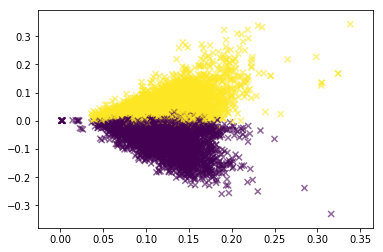

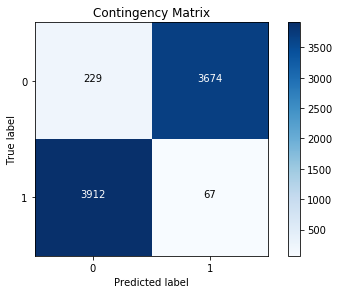

In [13]:
km = svd_pipeline(r, lsi_homo, X_8_tfidf, flag_norm = False)
print_cnf_and_score(label_8, km.labels_)

In [14]:
def nmf_pipeline(r, model, X, flag_norm = False, n_clusters = 2):
    best_r_nmf = r[np.argmax(model)]
    nmf = NMF(n_components = best_r_nmf, random_state = 42)
    nmf_train = nmf.fit_transform(X)
    if flag_norm:
        nmf_reduced = scale(nmf_train)
    else:
        nmf_reduced = nmf_train   
    km = KMeans(n_clusters, max_iter = 500, random_state = 42, n_init = 1).fit(nmf_reduced)
    
    if n_clusters == 2:
        plt.scatter(nmf_reduced[:, 0], nmf_reduced[:, 1], marker = 'x', c = km.labels_, alpha = .6)
    else:
        nmf_reduced_to_2 = TruncatedSVD(n_components = 2, random_state = 42).fit_transform(nmf_reduced)
        plt.scatter(nmf_reduced_to_2[:, 0], nmf_reduced_to_2[:, 1], marker = 'x', c = km.labels_, alpha = .6)
        
    return km

Contingency matrix
[[3587  316]
 [ 158 3821]]
Homogeneity Score: 0.676
Completeness Score: 0.677
V-measure Score: 0.676
Adjusted Rand Score: 0.774
Adjusted Mutual Info Score: 0.468


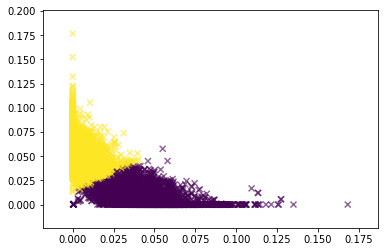

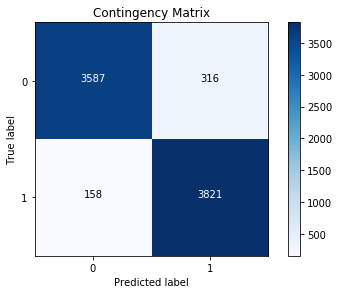

In [15]:
km = nmf_pipeline(r, nmf_homo, X_8_tfidf, flag_norm = False)
print_cnf_and_score(label_8, km.labels_)

#### (b) Visualize the transformed data as in part (a). Report the new clustering measures including the contigency matrix after transformation


- **For SVD**, we can just perform normalization to the TF-IDF matrix. Normalization is performed by calling *scale* function in the *sklearn.preprocessing* package.
> Normalization
>> By calling *svd_pipeline* and setting flag_norm equals to True, we can visualize the normalized data below. By calling *print_cnf_and_score*, we can see the contigency matrix, five measure scores as well as the contigency matrix heat-map.

- **For NMF**, we here present the visualiztion for: 
> 1. Normalization only
>> By calling *nmf_pipeline* and setting flag_norm equals to True, we can visualize the normalized data below. By calling *print_cnf_and_score*, we can see the contigency matrix, five measure scores as well as the contigency matrix heat-map.
> 2. Logrithm only
>> Here, we write a new function called *nmf_pipeline_with_log* whose inputs are similar to *nmf_pipeline* except that we add a new input called norm_first to determine whether to perform normaliation first or logrithm first. To avoid negative number that may cause NaN, we simply extract the minimum number to make all numbers positive first and then add 1e-3 to avoid zero. For NMF only with logrithm, we can set flag_norm to be False and norm_first to be False. After that, call *print_cnf_and_score* to show contigency matrix, contigency matrix heat-map, and five measure scores.
> 3. Normalization followed by logrithm
>> Call 'nmf_pipeline_with_log" while setting flag_norm to be True and norm_first to be True. After that, call *print_cnf_and_score* to show contigency matrix, contigency matrix heat-map, and five measure scores.
> 4. Logrithm followed by normalization
>> Call 'nmf_pipeline_with_log" while setting flag_norm to be True and norm_first to be False. After that, call *print_cnf_and_score* to show contigency matrix, contigency matrix heat-map, and five measure scores.

- Analysis: 
> Since five measure scores have similar trends when r increases, we may only look at one of them to compare the performance of SVD. For example, we compare their homogeneity scores.

> For SVD, after normalization, actually, the clustering performance is much worse than before. From the visualization result, the data cannot be separated at all. Therefore, unit variance of each column cannot help k-Means when applying SVD to it.
>
|k=2, without normalization|k=2, with normalization|
|-|-|
|0.776|0.005|

> However, for NMF, normalization could help a little bit. For example, the homogeneity score is previously 0.676, and after normalization, it raises to 0.682. This means more data are clustered correctly. Furthermore, applying logrithmic transformation to NMF can further help the clustering performance. This may be due to the internal logrithmic characteristics of our original data. Applying logrithm transformation followed by normalization gives similar results as the NMF without any transformation. However, applying normalization followed by logrithm transformation could devastate the clustering results. 
>
|k=2, without normalization|k=2, with normalization|k=2, with logrithm|k=2, with normalization then logrithm|k=2, with logrithm then normalization|
|-|-|-|-|-|
|0.676|0.682|0.705|0.146|0.699|

- **Question: Can you justify why logrithm transformation may increase the clustering results?**
> **Ans**: Our data may not be linearly separable, and for the most of time, data are of non-linear distribution. Therefore, if we want to cluster data and classify them into several categories, we need to perform transformation, for instance, logrithm transformation, if the data is originally distributed as a log curve to get a better clustering results.


##### SVD with normalization

Contingency matrix
[[3903    0]
 [3938   41]]
Homogeneity Score: 0.005
Completeness Score: 0.110
V-measure Score: 0.010
Adjusted Rand Score: -0.000
Adjusted Mutual Info Score: 0.004


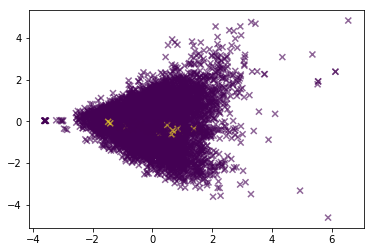

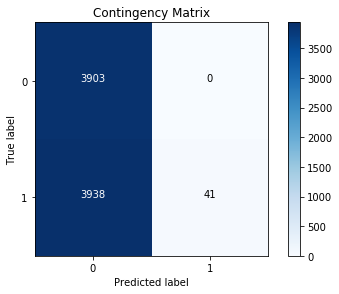

In [16]:
km = svd_pipeline(r, lsi_homo, X_8_tfidf, flag_norm = True)
print_cnf_and_score(label_8, km.labels_)

##### NMF with normalization

Contingency matrix
[[3534  369]
 [ 107 3872]]
Homogeneity Score: 0.682
Completeness Score: 0.685
V-measure Score: 0.684
Adjusted Rand Score: 0.773
Adjusted Mutual Info Score: 0.473


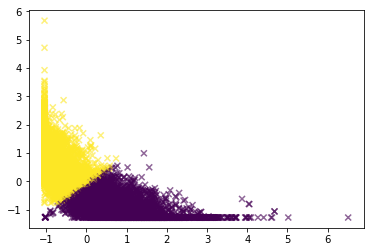

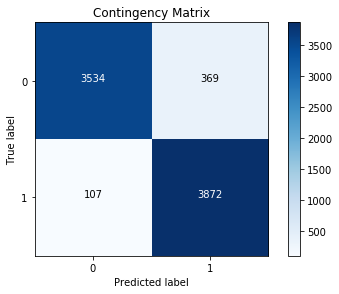

In [17]:
km = nmf_pipeline(r, nmf_homo, X_8_tfidf, flag_norm = True)
print_cnf_and_score(label_8, km.labels_)

##### NMF with logrithm

In [18]:
def nmf_pipeline_with_log(r, model, X, flag_norm = False, norm_first = True, n_clusters = 2):
    best_r_nmf = r[np.argmax(model)]
    nmf = NMF(n_components = best_r_nmf, random_state = 42)
    nmf_train = nmf.fit_transform(X)
    if flag_norm == False:
        nmf_reduced = np.log(1e-3 + nmf_train - nmf_train.min(0))
    else:
        if norm_first == True:
            nmf_train_norm = scale(nmf_train)
            nmf_reduced = np.log(1e-3 + nmf_train_norm - nmf_train_norm.min(0))
        else:
            nmf_train_log = np.log(1e-3 + nmf_train - nmf_train.min(0))
            nmf_reduced = scale(nmf_train_log)
            
    km = KMeans(n_clusters, max_iter = 300, random_state = 42, n_init = 1).fit(nmf_reduced)
    
    if n_clusters == 2:
        plt.scatter(nmf_reduced[:, 0], nmf_reduced[:, 1], marker = 'x', c = km.labels_, alpha = .6)
    else:
        nmf_reduced_to_2 = TruncatedSVD(n_components = 2, random_state = 42).fit_transform(nmf_reduced)
        plt.scatter(nmf_reduced_to_2[:, 0], nmf_reduced_to_2[:, 1], marker = 'x', c = km.labels_, alpha = .6)
        
    return km


Contingency matrix
[[3654  249]
 [ 163 3816]]
Homogeneity Score: 0.705
Completeness Score: 0.706
V-measure Score: 0.706
Adjusted Rand Score: 0.802
Adjusted Mutual Info Score: 0.489


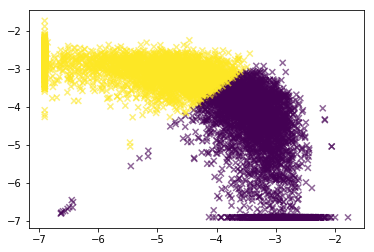

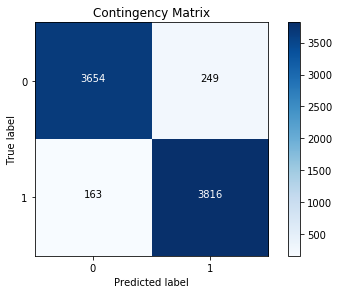

In [19]:
km = nmf_pipeline_with_log(r, nmf_homo, X_8_tfidf, flag_norm = False, norm_first = False)
print_cnf_and_score(label_8, km.labels_)

##### NMF with normalization first and then logrithm

Contingency matrix
[[1025 2878]
 [   0 3979]]
Homogeneity Score: 0.146
Completeness Score: 0.262
V-measure Score: 0.188
Adjusted Rand Score: 0.073
Adjusted Mutual Info Score: 0.101


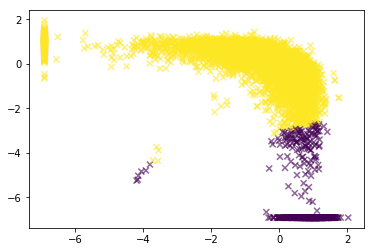

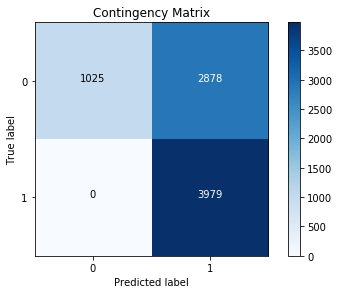

In [20]:
km = nmf_pipeline_with_log(r, nmf_homo, X_8_tfidf, flag_norm = True, norm_first = True)
print_cnf_and_score(label_8, km.labels_)


##### NMF with logrithm first and then normalization

Contingency matrix
[[3595  308]
 [ 125 3854]]
Homogeneity Score: 0.699
Completeness Score: 0.700
V-measure Score: 0.700
Adjusted Rand Score: 0.792
Adjusted Mutual Info Score: 0.484


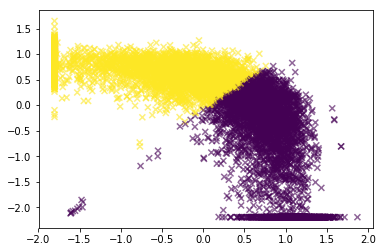

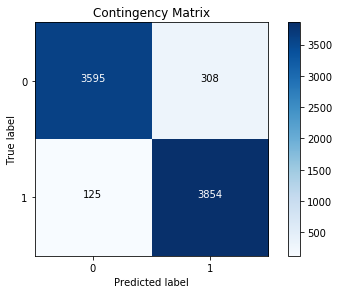

In [21]:
km = nmf_pipeline_with_log(r, nmf_homo, X_8_tfidf, flag_norm = True, norm_first = False)
print_cnf_and_score(label_8, km.labels_)

### Problem 5
- Expand dataset into 20 categories and retrieve all original sub-class labels with clustering. Get TF-IDF matrix using the same parameters in part 1.
> Instead of using just eight categories, we here use the whole dataset. Still min_df = 3, and use *CountVectorizer* to get the term-document matrix and use *TfidfTransformer* to get the TF-IDF matrix.
> The size of TF-IDF matrix we extract for 20 categories is **(18846, 52268)**.
- Try different dimensions for both truncated SVD and NMF.
> To be consistent with the problem 3, we are still using r in the range of [1,2,3,5,10,20,50,100,300]. Contigency matrices, contigency matrix heat-maps as well as their five measure scores for SVD and NMF are shown below. 
- Next, we try different transformation on SVD and NMF. 
> - **For SVD**:
>> We show the **contigency matrix, contigency matrix heat-map, and five measure scores** of **SVD with no normalization** and **SVD with normalization**. Since k = 20 when performing k-Means clustering, when visualizting them in the 2D space, we perform an addition dimension reduction which is already written in the function *svd_pipeline*.
> - **For NMF**:
>> We will show the **contigency matrix, contigency matrix heat-map, and five measure scores** of **NMF with no normalization or logrithm**, **NMF with normalization only**, **NMF with logrithm only**, **NMF with normalization first followed by logrithm** and **NMF with logrithm first then normalization**. Still, since k = 20 when performing k-Means clustering, when visualizting them in the 2D space, we perform an addition dimension reduction which is already written in the function *svd_pipeline*.

- Analysis:
> After trying different dimension for SVD and NMF when we fix k = 20 for k-Means clustering, we find that **r = 10 gives the best scores for both of SVD and NMF**. Our expectation is to find r around 20, however r = 10 could also be possible that since theses twenty categories are from two main classes: computer technology and recreation activity, maybe some of them are too similar to others in the same main class such that k-Means clustering cannot spearate them.

> Since five measure scores have similar trends when r increases, we may only look at one of them to compare the performance of SVD. For example, we compare their homogeneity scores.
> For SVD, it is the same as before that SVD without normalization can give better clustering results than SVD with normalization. However, the difference in performance when k = 20 is not that large as k = 2. Moreover, performance for SVD without normalization when k = 20 is worse than when k = 2. It is because that clustering data into 20 categories is more difficult than clustering into 2 categories. 
>
|k=2, without normalization|k=2, with normalization|k=20, without normalization|k=20, with normaliazation|
|-|-|-|-|
|0.776|0.005|0.341|0.315|

> For NMF, we also compare homogeneity scores as an example. It can be seen that the average performance of k = 20 is worse than that of k = 2 due to the increase in no. of clusters and this agrees with our expectation. What is more, for k = 20 when performing k-Means clustering, whether there is non-linear transformatioin or not, there is no big diffrence. 

>- When k = 2 for k-Means clustering
>
|k=2, without normalization|k=2, with normalization|k=2, with logrithm|k=2, with normalization then logrithm|k=2, with logrithm then normalization|
|-|-|-|-|-|
|0.676|0.682|0.705|0.146|0.699|

>- When k = 20 for k-Means clustering
>
|k=20, without normalization|k=20, with normalization|k=20, with logrithm|k=20, with normalization then logrithm|k=20, with logrithm then normalization|
|-|-|-|-|-|
|0.317|0.309|0.370|0.251|0.366|

In [22]:
from sklearn.datasets import fetch_20newsgroups

X_20 = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

data_20 = X_20.data 
label_20 = X_20.target
# label_all_groups = (X_all_groups.target > 3).astype(int)

# Get the term-document matrix under the condition: min_df=3
count_vect_3_groups = CountVectorizer(min_df=3, stop_words = combined_stopwords)

X_20_counts = count_vect_3_groups.fit_transform(data_20)

# Get the TF_IDF feature matrix
tfidf_transformer = TfidfTransformer()
X_20_tfidf = tfidf_transformer.fit_transform(X_20_counts)
print(X_20_tfidf.shape) # = (18846, 52268)

(18846, 52268)


#### Try different dimensions for SVD and NMF

----------------------------------------
When r is 1 , Contigency matrix is: 
Contingency matrix
[[ 47  63  23  22  66  65   0   0  49  84   1  32  57   7  41  12  70  77
   67  16]
 [102  25 109   3  51  90   5  24  14  64  52 125 110   2   7   2  33  56
   21  78]
 [ 88  41  55   9  61 110   0  23  24 110  21  84 100   0  24   4  56  88
   38  49]
 [ 93  45  75   3  72  96   0   3  29  99  29  96  88   1  21   0  57  80
   40  55]
 [119  39  76   1  68  81   1   3  29 106  33  90  98   2  18   3  53  68
   27  48]
 [107  28 123   5  39  77   3  18   8  74  88 121  82   4   5   1  21  52
   13 119]
 [116  25  99   0  56  81   0   5  14  87  56 108 109   1   8   0  51  53
   15  91]
 [ 86  42  84   7  68 114   0   2  34  91  27  72 110   1  19   4  40  80
   31  78]
 [104  26  88   3  62 133   0   0  20 108  18 124 122   0   5   1  31  71
   31  49]
 [ 94  45  63  11  81  99   0   6  19  81  32  91 100   1  22   2  66 100
   33  48]
 [ 97  36 100   3  70 104   0   9  16 115  48  85 102

----------------------------------------
When r is 20 , Contigency matrix is: 
Contingency matrix
[[339 112   0   0  53   1   0   0   1 138  38  21   0   0  73   1   0   1
    0  21]
 [  3 551   0   0 141  18   0   0   2   0   0   2   2   0   0   1   0   0
  246   7]
 [  1 212   1  11  80   3   0   0  11   0   0   3   2   0   0   0   0   0
  647  14]
 [  0 355   4 198 218   8   0   0   4   0   0   0   3   0   0   0   0   0
  162  30]
 [  0 634   2  78 149  10   0   0   1   0   1   2  14   0   0   0   0   0
   47  25]
 [  0 404   0   0 204  27   0   0   1   0   0   0   2   0   0   0   0   4
  342   4]
 [  2 591  13  55 213   4   0   0   6   0   0   1  33   0   0   3   0   0
   40  14]
 [  1 357   0   0 497  12   0   0   0   0   0  66  31   0   0   2   0   0
    2  22]
 [ 14 283   2   0 645  20   0   0   1   0   0  15   7   0   0   0   0   0
    0   9]
 [  1 368 445   0 155   3   0   0   1   0   0   9   7   0   0   4   0   0
    0   1]
 [  1 139 794   0  50   3   0   0   0   0   0   1   

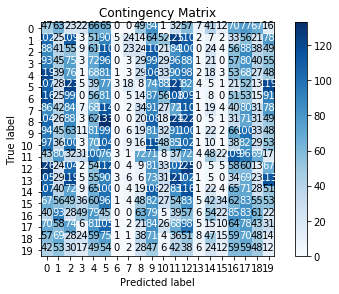

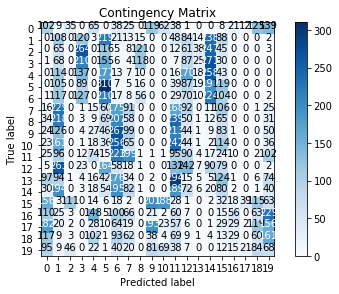

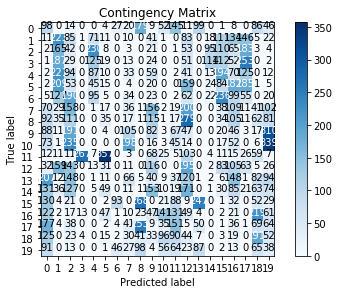

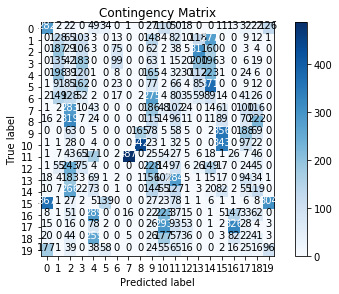

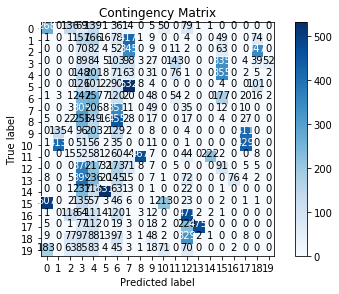

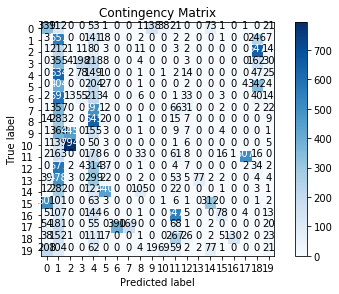

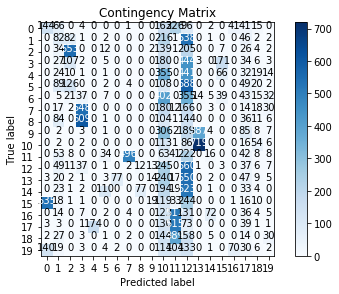

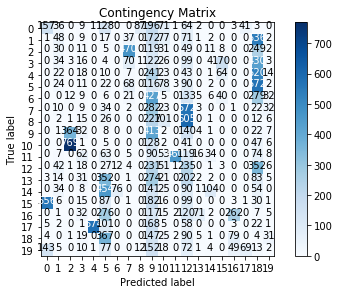

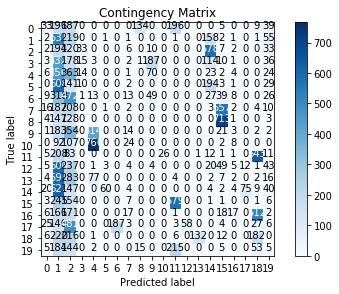

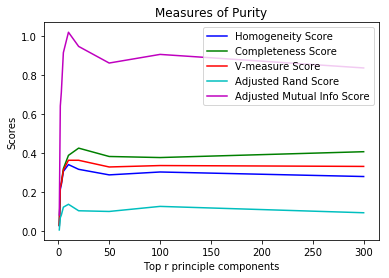

In [23]:
# perform with LSI
r = [1,2,3,5,10,20,50,100,300]
homo_lsi = []
comp_lsi = []
vmeas_lsi = []
adjrs_lsi = []
mutis_lsi = []
for each_r in r:
    svd = TruncatedSVD(n_components = each_r, random_state = 42)
    svd_reduced = svd.fit_transform(X_20_tfidf)
    km = KMeans(n_clusters = 20, max_iter = 500, random_state = 42, n_init = 1).fit(svd_reduced)
    print('-'*40)
    print('When r is', each_r, ', Contigency matrix is: ')
    cnf_matrix = metrics.confusion_matrix(label_20, km.labels_)
    print_plot_cnf_matrix(cnf_matrix, np.arange(20))
    
    print_scores(label_20, km.labels_)
    lsi_homo_20 = save_scores(label_20, km.labels_, homo_lsi, comp_lsi, vmeas_lsi, adjrs_lsi, mutis_lsi)

plt.figure()
plt.plot(r, homo_lsi, 'b', label = 'Homogeneity Score')
plt.plot(r, comp_lsi, 'g', label = 'Completeness Score')
plt.plot(r, vmeas_lsi, 'r', label = 'V-measure Score')
plt.plot(r, adjrs_lsi, 'c', label = 'Adjusted Rand Score')
plt.plot(r, mutis_lsi, 'm', label = 'Adjusted Mutual Info Score')
plt.xlabel('Top r principle components')
plt.ylabel('Scores')
plt.legend(loc = 'upper right')
plt.title('Measures of Purity')
plt.show()

----------------------------------------
When r is 1 , Contigency matrix is: 
Contingency matrix
[[ 47  63  23  22  66  64   0   0  49  84   1  32  58   7  41  12  70  77
   67  16]
 [101  25 109   3  51  91   5  24  14  64  52 126 110   2   7   2  33  55
   21  78]
 [ 88  42  55   9  61 111   0  23  23 110  21  84 100   0  24   4  56  87
   38  49]
 [ 93  45  75   3  72  97   0   3  29  99  29  96  88   1  21   0  57  79
   40  55]
 [118  38  75   1  68  82   1   3  29 105  33  91  98   2  18   3  54  68
   27  49]
 [107  28 123   5  39  77   3  18   8  73  88 121  83   4   5   1  21  52
   13 119]
 [114  25  98   0  56  82   0   5  14  85  56 110 110   1   8   0  51  53
   15  92]
 [ 87  42  84   7  68 113   0   2  34  91  27  72 110   1  19   4  40  80
   31  78]
 [103  26  89   3  62 133   0   0  20 108  18 124 122   0   5   1  31  71
   31  49]
 [ 94  45  63  11  81  99   0   6  19  82  32  91 100   1  22   2  66  99
   33  48]
 [ 97  36 101   3  70 104   0   9  16 114  48  84 103

V-measure Score: 0.337
Adjusted Rand Score: 0.122
Adjusted Mutual Info Score: 0.947
----------------------------------------
When r is 20 , Contigency matrix is: 
Contingency matrix
[[128   0 293   0  74   0  38  45   1  70   1 144   0   0   0   0   3   2
    0   0]
 [  0   0 403   0 116   0   0   1   0  82   2   1   0   0   0 342   7  17
    0   2]
 [  0   0 177   0  60   0   0  11   0  35  12   0  10   0   0 665   9   4
    0   2]
 [  0   4 305   0 168   0   0  17   0  29   4   0 200   0   0 218  21  13
    0   3]
 [  0   1 568   0 109   0   0  25   0  24   1   0  85   0   0 110  14  12
    0  14]
 [  0   0 296   0 138   0   0   2   5  87   2   0   0   0   0 422   3  31
    0   2]
 [  0  14 621   0 158   0   0   3   0   5   7   0  59   0   0  59  12   4
    0  33]
 [  0   0 510   0 373   0   0  26   0  27   1   0   0   0   0   4   5  13
    0  31]
 [  0   2 353   0 490   0   0   9   0 107   1   0   0   0   0   0   8  20
    0   6]
 [  0 397 431   0 145   0   0   6   0   2   1   0   0

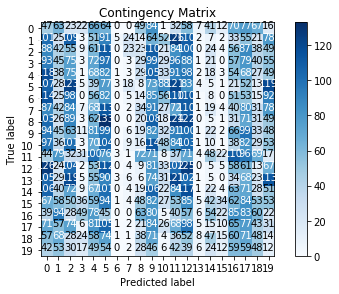

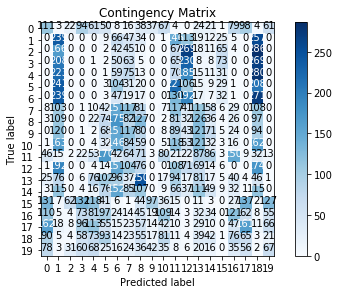

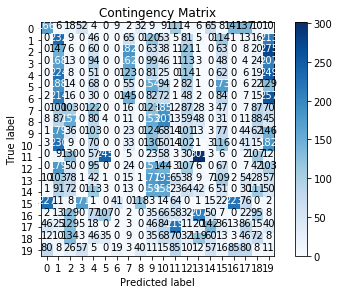

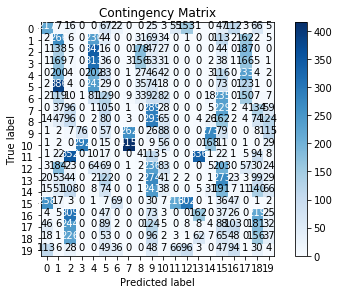

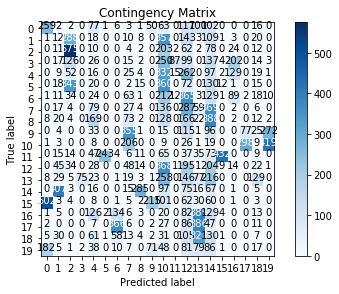

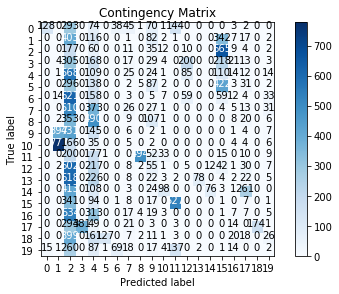

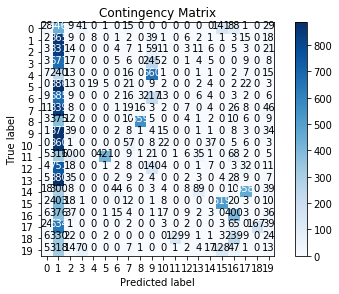

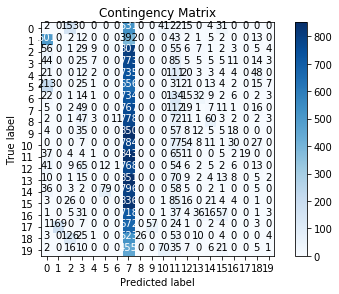

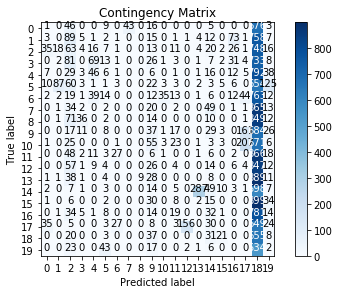

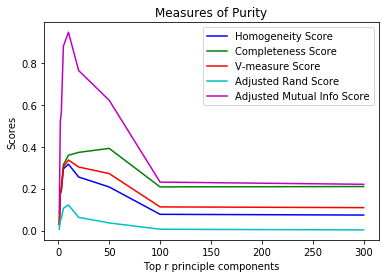

In [24]:
# perform with NMF
r = [1,2,3,5,10,20,50,100,300]
homo_nmf = []
comp_nmf = []
vmeas_nmf = []
adjrs_nmf = []
mutis_nmf = []
for each_r in r:
    nmf = NMF(n_components = each_r, random_state = 42)
    nmf_reduced = nmf.fit_transform(X_20_tfidf)
    km = KMeans(n_clusters = 20, max_iter = 500, random_state = 42, n_init = 1).fit(nmf_reduced)
    print('-'*40)
    print('When r is', each_r, ', Contigency matrix is: ')
    cnf_matrix = metrics.confusion_matrix(label_20, km.labels_)
    print_plot_cnf_matrix(cnf_matrix, np.arange(20))

    print_scores(label_20, km.labels_)
    nmf_homo_20 = save_scores(label_20, km.labels_, homo_nmf, comp_nmf, vmeas_nmf, adjrs_nmf, mutis_nmf)
    
plt.figure()
plt.plot(r, homo_nmf, 'b', label = 'Homogeneity Score')
plt.plot(r, comp_nmf, 'g', label = 'Completeness Score')
plt.plot(r, vmeas_nmf, 'r', label = 'V-measure Score')
plt.plot(r, adjrs_nmf, 'c', label = 'Adjusted Rand Score')
plt.plot(r, mutis_nmf, 'm', label = 'Adjusted Mutual Info Score')
plt.xlabel('Top r principle components')
plt.ylabel('Scores')
plt.legend(loc = 'upper right')
plt.title('Measures of Purity')
plt.show()


##### Try SVD and NMF with different transformations

##### For SVD, firstly try with no transformation

Contingency matrix
[[268   0 136  69 139   1  36  14   0   5  50   0  79   1   1   0   0   0
    0   0]
 [  1   0   1 157 166  16  78 417   1   9   0   0   4   0   0  49   0   0
   74   0]
 [  0   0   0  70  82   4  52 345   0   9   0  11   2   0   0  63   0   0
  347   0]
 [  0   0   0  89  84   5 103  98   3  27   0 143   0   0   0 335   0   4
   39  52]
 [  0   0   0 148 201   8  71  63   0  31   0  76   1   0   0 355   0   2
    5   2]
 [  0   0   0 126 101  22  90 532   8   4   0   0   0   0   0   4   0   0
  101   0]
 [  1   3   1 247 257   7 120  20   0  48   0  54   2   0   0 177   0  20
   16   2]
 [  0   0   3 305 206   8 351  11   0  49   0   0  35   0   0  12   0  10
    0   0]
 [  5   0  22 256 149  16 455  28   0  17   0   0  17   0   0   4   0  27
    0   0]
 [  0 135   4  96 203   2 129   2   0   8   0   0   4   0   0   0   0 411
    0   0]
 [  1 413   0  51  56   2  35   0   0  11   0   0   1   0   0   0   0 429
    0   0]
 [  0   0  15  52  58  12  60  44 467   7   0 

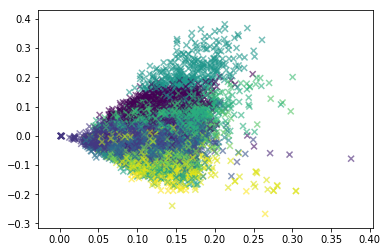

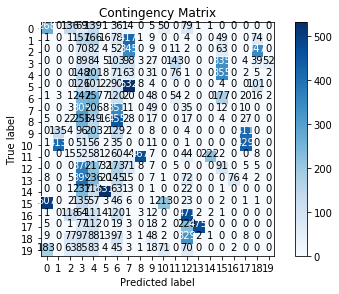

In [25]:
km = svd_pipeline(r, lsi_homo_20, X_20_tfidf, flag_norm = False, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))

##### For SVD, secondly try with normalization

Contingency matrix
[[ 48 139   0   0   0  69  51 116   0   0   1   1   5   0   1  40 229  27
    0  72]
 [ 69   2   1   0  60 142   0  52   0   0   7   0   9  25  12 176   1 411
    0   6]
 [ 52   0   0   0 326  77   0  25   2   0   1   0   9  41   8  87   0 354
    0   3]
 [111   1   3   3  35 103   0  29 100   0   0   0  29 304  12 133   0 117
    0   2]
 [ 81   0   1   1   9 259   0  61  22   0   4   0  34 243   8 165   0  71
    0   4]
 [ 82   1   8   0  99  59   0  50   0   0  14   0   4   1  16 169   0 485
    0   0]
 [107   1   0  13  14 345   0  47  16   0   1   0  47 116   8 222   1  32
    0   5]
 [330   4   0   0   0 281   0  28   0   0   4   0  48   8  21 180   0   8
    0  78]
 [448  28   0   3   1 182   0  55   0   0   2   0  16   2  22 174   8  28
    0  27]
 [133   4   0 371   0 215   0 110   0   0   1   0   8   0   4 134   0   4
    0  10]
 [ 37   1   0 717   0  88   0  33   0   0   0   0  11   0   3 107   1   0
    0   1]
 [ 60  13 451   0   8  32   0  45   0   0   8 

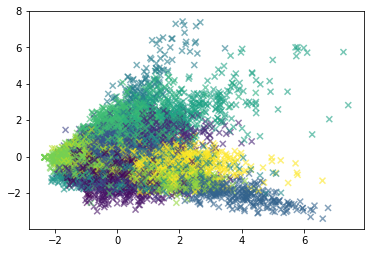

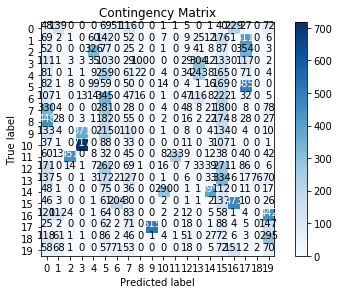

In [26]:
km = svd_pipeline(r, lsi_homo_20, X_20_tfidf, flag_norm = True, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))

##### For NMF, firstly try without any transformation

Contingency matrix
[[259   2   2   0  77   1   6   3   1  50  63   0 117 100 102   0   0   0
   16   0]
 [  1  12 288   0  18   0   0  10   8   0 357   0 143   3 109   1   3   0
   20   0]
 [  0  11 575   0  10   0   0   4   2   0 203   2  62   2  78   0  24   0
   12   0]
 [  0  17 126   0  26   0   0  15   2   0 250  87  99   0 137   4 202   0
   14   3]
 [  0   9  52   0  16   0   0  25   4   0 332  15 262   0  97   2 129   0
   19   1]
 [  0  18 343   0  20   0   0   2  15   0 360   0  72   0 130  12   1   0
   15   0]
 [  1  11  34   0  24   0   0  63   1   0 212  12 365   3 129   1  89   2
   18  10]
 [  0  17   4   0  79   0   0  27   4   0 136   0 287  59 369   0   2   0
    6   0]
 [  8  20   4   0 169   0   0  73   2   0 128   0 166  22 388   0   2   0
   12   2]
 [  0   4   0   0  33   0   0 355   1   0  15   0 115   1  96   0   0  77
   25 272]
 [  1   3   0   0   8   0   0 206   0   0   9   0  26   1  19   0   0 298
    9 419]
 [  0  15  14   0  47 243   4   6  11   0  65 

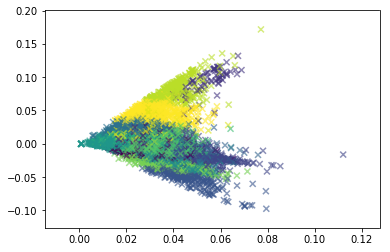

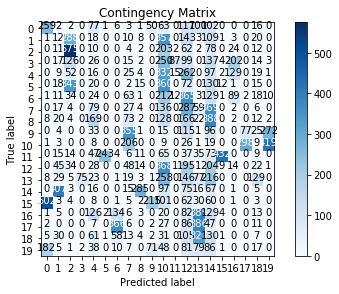

In [27]:
km = nmf_pipeline(r, nmf_homo_20, X_20_tfidf, flag_norm = False, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))

##### NMF with normalization

Contingency matrix
[[223  69  75   0   6   1   0   4   0   1   0   0 104  79  74  49   0   2
    0 112]
 [  1  17  45   1   0   8   0 400   0   0  91   0 157   1 157   0   3  10
    0  82]
 [  0   9  22   0   0   2   0 386   2   0 327   1  87   0  65   0  21   9
    0  54]
 [  0  23  56   3   0   1   0 222  86   0  37   7 107   0 112   0 193  13
    0 122]
 [  0  14 102   1   0   4   0 159  15   0   5   2 264   1 169   0 126   8
    0  93]
 [  0  17  24  12   0  15   0 459   0   0 118   0  96   0 129   0   1  15
    0 102]
 [  1  22 146   0   0   1   0  67  11   0   7  15 330   0 160   0  82  10
    3 120]
 [  0  69  99   0   0   4   0   8   0   0   0   6 258  34 156   0   2  16
    0 338]
 [  4 159  66   0   0   2   0  17   0   0   0  17 169  13 155   0   2  19
    0 373]
 [  0  32  72   0   0   1   0   2   0   0   0 429 164   0  63   0   0   4
  120 107]
 [  1   6  39   0   0   0   0   0   0   0   0 445  51   1  25   0   0   3
  400  28]
 [  0  47  17 421   4  11   0  33   0 240   7 

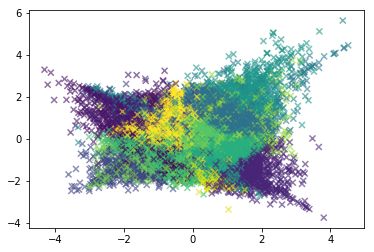

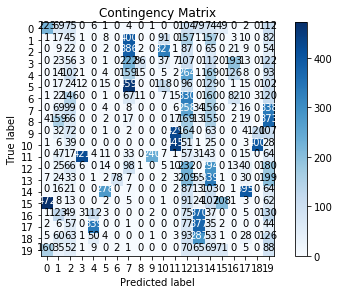

In [28]:
km = nmf_pipeline(r, nmf_homo_20, X_20_tfidf, flag_norm = True, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))

##### NMF with logrithm

Contingency matrix
[[203   4  19   0  61   0   1  20   0  12 227   2   1 173   1   0  59   1
    8   7]
 [  7  60   0 211  63  31  44   9   4  60   2   5   5   0 157  17   1  10
   26 261]
 [  3  27   0 265  30  65  64  16   0  22   0   2   3   0 215  18   0   3
    8 244]
 [  0  51   0  45  22 345 308  10   4  29   1   3   2   0  45  21   2   9
    8  77]
 [  1 117   6  22  34 391 183  18   3  26   0   1  10   0  16  14   0  14
    6 101]
 [  3  16   0 223  40   2  22   8   6  29   0   7   2   1 369  34   0  17
   13 196]
 [  2 146  10  11  25 304 110  84  16  17   0   5  54   3  21  14   1   5
   16 131]
 [  1 336  18   5  30   7  31 207   8  94   6   5  16   1  42  11  86   5
   30  51]
 [  2 204   9   0  42  15  35 263  27 136  18   9  15   0  70  29  80   0
   11  31]
 [ 16  85   4   0  49   0   1  85 218  37   0   3 454   0   9   3   2   1
    7  20]
 [ 10  13   1   1   8   0   1  23 440   8   0   0 483   1   2   2   0   0
    4   2]
 [  6  17   6   6  25   2  15   4   2  40   0 

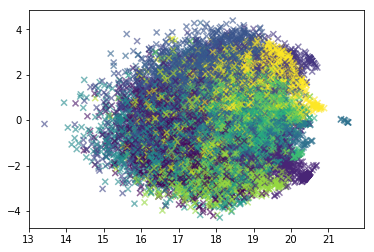

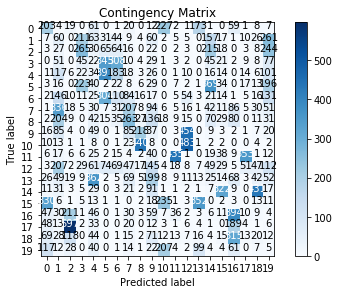

In [29]:
km = nmf_pipeline_with_log(r, nmf_homo_20, X_20_tfidf, flag_norm = False, norm_first = False, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))

##### NMF with normalization first and then logrithm

Contingency matrix
[[ 52   4   3   1  88  55 175   1   3  98 121   0  11   1   2 120  24   6
   30   4]
 [101  13  52  18  82   0   0   0  45  93   0  74  60   0 163   4   0  81
   16 171]
 [ 47  33  65   5  57   0   0   0  44  30   0 127  20   2 110  11   0 153
    9 272]
 [ 33  53 258  10   6   1   0   1 108  39   1 287 104   1  19   2   5  23
    3  28]
 [ 47 110 149   9   6   7   0   4 114  49   2 244 174   5  11  10   7   3
    0  12]
 [ 75   6  37  24  76   0   0   0  28  34   1  16  20   1 246   7   1 182
   38 196]
 [ 33  88 135  10  16  12   2   7 182  17   2 260 116  31  17   4   4   6
    3  30]
 [  7 223  39  23  75 139   8  11  48  70  37   2 177   8  60   5  24  15
   13   6]
 [  0 157  23  25 113 136  15   2  87  98  44   2 105  24  46   3  21  57
   32   6]
 [ 25  29   0   6  71 191   2   0  79  57   1   7  32 326  13  65   7  27
   43  13]
 [ 28  17   1  22  25  63   2   0  96  16   1   5   6 596   3  59   0  31
   25   3]
 [103   0  22  52  33   3   0   1  23  50   2 

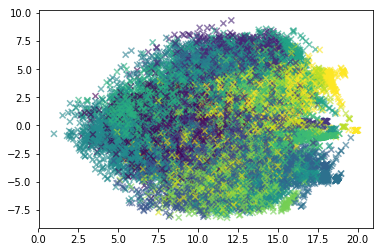

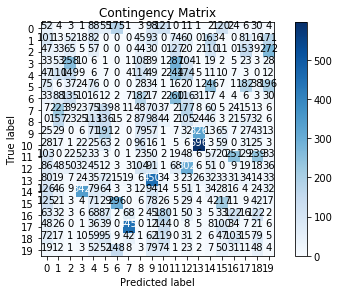

In [30]:
km = nmf_pipeline_with_log(r, nmf_homo_20, X_20_tfidf, flag_norm = True, norm_first = True, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))

##### NMF with logrithm first and then normalization

Contingency matrix
[[ 99   3   0   5   0   0   2  39  58   1   6   2 228   1 139   1   1   0
  184  30]
 [ 29  22  74  29  10  21 305   0  47 232 103   0  11   5   1   7  42  17
    0  18]
 [  7   9  25  13   4  61 328   1  21 323  74   0   4   2   0   7  85  10
    0  11]
 [  8  14 114  17   5 314  66   0   5  45  53   0   3   2   1   7 304   5
    0  19]
 [ 18  36 169  10   7 362  81   0   6  18  37   3   4   9   0   4 165   4
    0  30]
 [ 14   4  21  39  12   1 256   0  26 422 113   0   3   1   0  19  21  15
    1  20]
 [  2  81 112  11  37 304  87   1   7  14  48   9   8  32   0   5 106   8
    4  99]
 [ 46 370  22  25  36  15  35  40  33  29  12   8  18  11   2   7  35  19
    1 226]
 [ 67 251   9  31 145  22  23  67  49  42  15   7  16  10   1   4  39   7
    9 182]
 [ 69  71   8   8 225   0  17   0  39   3  38   1  20 456   0   0   1   3
    1  34]
 [ 14  10   1  12 236   1   3   0  18   2  19   1   1 674   0   0   0   0
    1   6]
 [ 39   2  55   0   2   0  13   6  34  15  25 

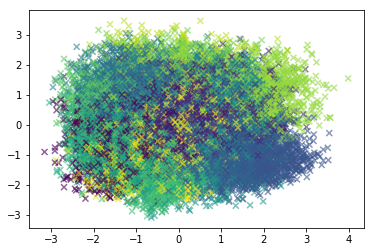

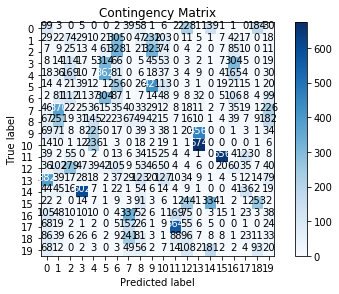

In [31]:
km = nmf_pipeline_with_log(r, nmf_homo_20, X_20_tfidf, flag_norm = True, norm_first = False, n_clusters = 20)
print_cnf_and_score(label_20, km.labels_, classes = np.arange(20))